In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# URL of the Wikipedia page
url = "https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_population"
brewery_path = "Population Data/State_Beer_Report_All.csv"
# Read file paths into DataFrame objects
tables = pd.read_html(str(url), header=1)
breweries = pd.read_csv(brewery_path)
# Assuming the first table on the page is the one we want
state_pop_df = tables[0]

# Display the DataFrame
# print(state_pop_df)


In [2]:
# breweries in 2023
breweries_2023 = pd.DataFrame(breweries[breweries["Year"].isin([2023])])
# brewries_2023 = breweries_2023['Brewery Count'].drop(",")
breweries_2023["Brewery Count"] = [float(str(i).replace(",", "")) for i in breweries_2023["Brewery Count"]]
# breweries_2023['Brewery Count'].astype(float)
breweries_2023.head()

,Year,Quarter,STATE,Production,In Bottles & Cans,In Kegs,"Tax-Determined,\nPremises Use","For Export,\nVessels &\nAircraft",Consumed On\nBrewery\nPremises,Stocks On Hand\nEnd-of-Month,Brewery Count
1632,2023,Q1,Alabama,"17,504.79",-,-,"10,712.60",0,-,"8,377.51",93.0
1633,2023,Q1,Alaska,"38,688.40",-,-,"7,625.32",0,-,"19,159.85",79.0
1634,2023,Q1,Arizona,-,-,"14,432.34","16,232.84",-,-,-,186.0
1635,2023,Q1,Arkansas,"11,523.08",-,-,"5,497.92",0,-,"4,853.23",90.0
1636,2023,Q1,California,"3,435,315.54","2,677,835.84","269,028.40","105,135.22",-,760.89,"1,111,957.21",1563.0


In [3]:
# pulling specific counts
brewery_by_state = breweries_2023[["STATE", "Brewery Count"]]
brewery_count_by_state = {}

# Iterate through each row in brewery_by_state DataFrame
for index, row in brewery_by_state.iterrows():
    state = row['STATE']
    brewery_count = row['Brewery Count']
    
    # Add the brewery count to the corresponding state in the dictionary
    if state in brewery_count_by_state:
        brewery_count_by_state[state] += brewery_count
    else:
        brewery_count_by_state[state] = brewery_count

# Convert the dictionary to a DataFrame
total_breweries_by_state = pd.DataFrame(list(brewery_count_by_state.items()), columns=['State', 'Total Brewery Count'])

# print(total_breweries_by_state)


In [4]:
population_by_state_df = state_pop_df.drop([31, 52, 53, 54, 55, 56, 57, 58, 59])
# population_by_state_df = state_pop_df.drop(state_pop_df.index[31])
population_by_state_df.head()

,State or territory,"July 1, 2023 (est.)","April 1, 2020",%,Abs.,Seats,%.1,Pop. per elec. vote (2020)[c],Pop. per seat (2020)[a],% US (2020),% EC (2020)
0,California,38965193.0,39538223,6.13%,2284267,52,11.95%,732189,760350,11.800%,10.04%
1,Texas,30503301.0,29145505,15.91%,3999944,38,8.74%,728638,766987,8.698%,7.43%
2,Florida,22610726.0,21538187,14.56%,2736877,28,6.44%,717940,769221,6.428%,5.58%
3,New York,19571216.0,20201249,4.25%,823147,26,5.98%,721473,776971,6.029%,5.20%
4,Pennsylvania,12961683.0,13002700,2.36%,300321,17,3.91%,684353,764865,3.881%,3.53%


In [5]:
pop_by_state = pd.DataFrame(population_by_state_df.loc[ : , ['State or territory', 'April 1, 2020']])
pop_by_state = pop_by_state.rename(columns = {"State or territory": "State"})
pop_by_state.head()

,State,"April 1, 2020"
0,California,39538223
1,Texas,29145505
2,Florida,21538187
3,New York,20201249
4,Pennsylvania,13002700


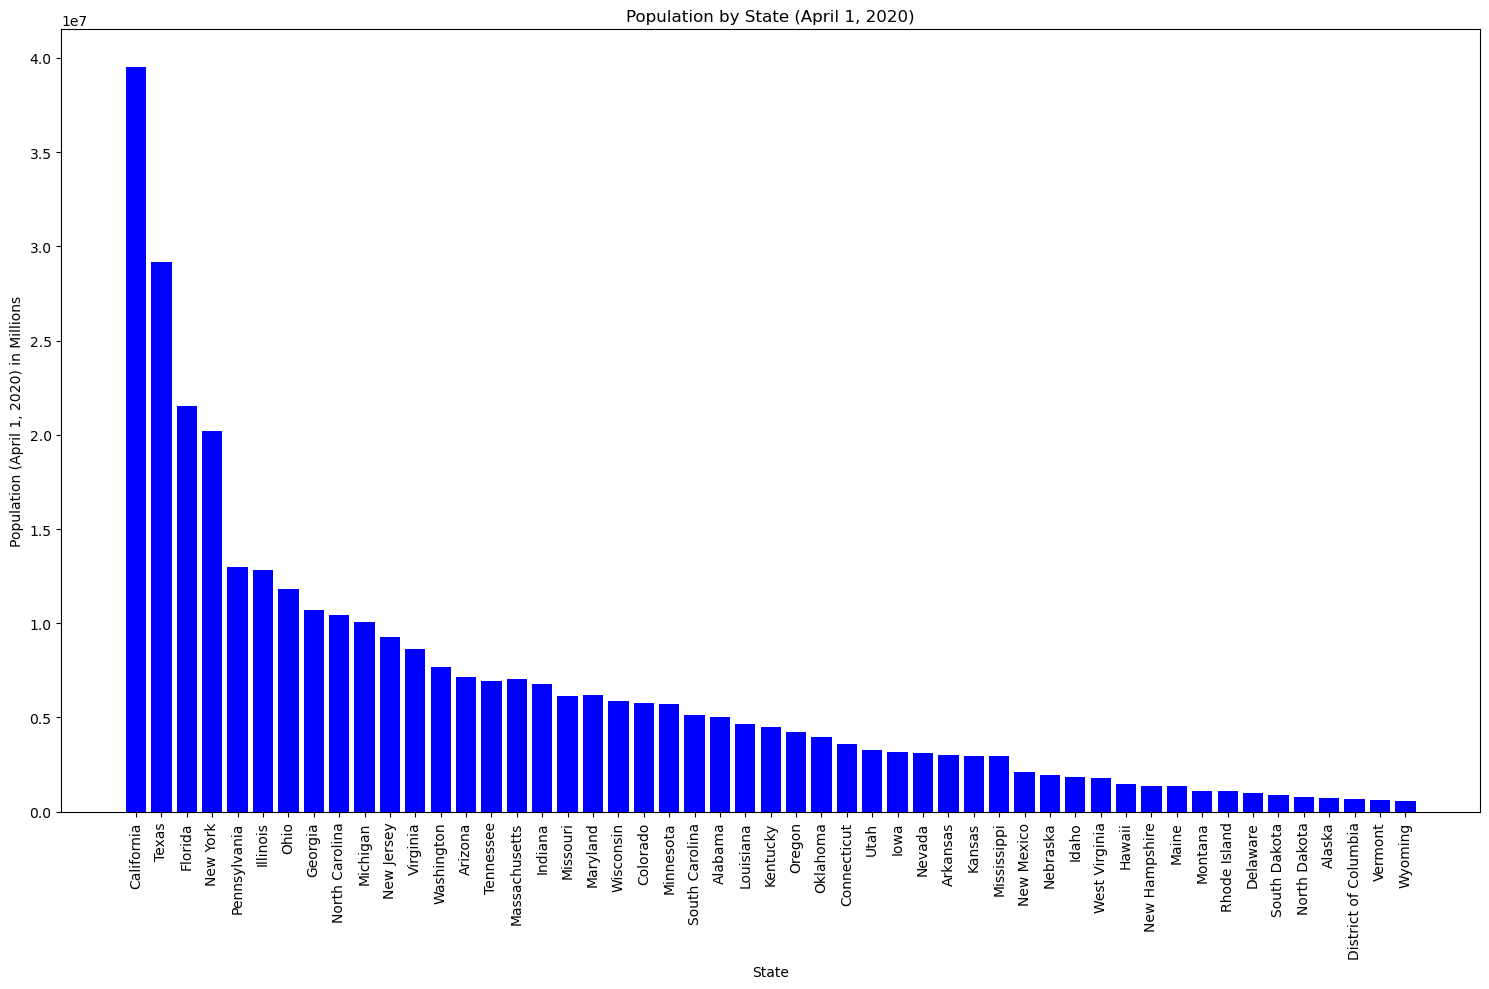

In [6]:
plt.figure(figsize=((15, 10)))

plt.bar(pop_by_state['State'], pop_by_state['April 1, 2020'], color='blue')
plt.xlabel('State')
plt.ylabel('Population (April 1, 2020) in Millions')
plt.title('Population by State (April 1, 2020)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [7]:
# Merge the pop_by_state and total_breweries_by_state DataFrames on the 'State' column
merged_data = pd.merge(pop_by_state, total_breweries_by_state, on='State')

# Calculate the ratio of population to number of breweries
merged_data['Population per Brewery'] = (merged_data['April 1, 2020'] / merged_data['Total Brewery Count']).round()


# print(merged_data)


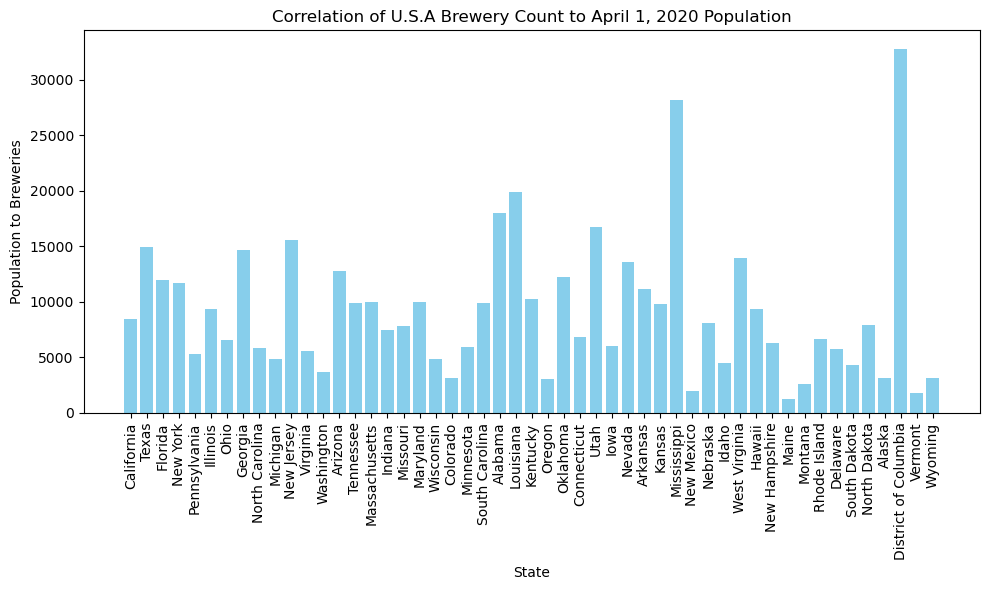

In [8]:
plt.figure(figsize=(10, 6))
plt.bar(merged_data['State'], merged_data['Population per Brewery'], color='skyblue')
plt.xlabel('State')
plt.ylabel('Population to Breweries')
plt.title('Correlation of U.S.A Brewery Count to April 1, 2020 Population')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()